# Generating a list of numbers

In [1]:
import random
#Setting random.seed ensures that all the operations and evaluations below are based on the same data. 
random.seed(42)
#Produce 100000 floating point numbers within the given range
L1 = [random.random() for i in range(10000)] 

# Choose sizes of lists used

In [2]:
#Use three kinds of size: sizes of L1, sample1 (randomly select 100 numbers from L1) and sample2 (randomly select 1000 numbers from L1) 
from random import sample
sample1 = sample(L1,100)
sample2 = sample(L1, 1000)

# Evaluation1: Finding the mean of a list of numbers

In [3]:
#The user-defined function can time three methods of finding the mean of a list of numbers
def timing1(List):

    def py_mean():
        # "list" has no attribute "mean", we need to transform the "list" to "array" first
        import numpy as np
        Array = np.array(List)
        mean1 = round(Array.mean(),5)
        return mean1
    def np_mean():
        import numpy as np
        mean2 = round(np.mean(List),5)
        return mean2
    def DF_mean():
        import pandas as pd
        Ldf = pd.DataFrame(data = List, columns=["number"])
        mean3 = round(pd.DataFrame.mean(Ldf),5)
        return mean3

    import timeit
    #The List “calculations1” are created to store these functions, preparing for the timeit() function below. 
    calculations1 = [py_mean, np_mean, DF_mean]
    y1 = []
    for calculation in calculations1:
        #"repeat" specifies how many times to call timeit(). "number" specifies the number argument for timeit().
        #The minimum value of each timeit.repeat() is worthy to be documented.
        mean_time = min(timeit.repeat(stmt = calculation, number = 100, repeat = 100))
        y1.append(mean_time)    
    return y1


In [4]:
y1_1 = timing1(L1)
y1_2 = timing1(sample1)
y1_3 = timing1(sample2)

print(y1_1)
print(y1_2)
print(y1_3)

[0.023977899999999774, 0.02551509999999979, 0.07041330000000023]
[0.0011818000000012319, 0.0014199000000001405, 0.027916199999999947]
[0.0034410999999998637, 0.003625799999998236, 0.033630200000001054]


# Evaluation2: Sorting a list of numbers

In [5]:
#Whether the loops in one timeit() function 
#or the multiple times of calling timeit() function in the time.repeat function will repeat the statements in each calculation
#If the sort() function is repeated certain times,
#the number list participating in each measurement of timeit() function is already sorted from the second loop

#The user-defined function can time three methods of sorting a list of numbers
def timing2(List):
    
    loop = 0
    Time1 = []
    Time2 = []
    Time3 = []
      
    def py_sort():
        import numpy as np
        Array = np.array(List)
        List_sort1 = Array.sort()
        return List_sort1
    def np_sort():
        import numpy as np
        List_sort2 = np.sort(List)
        return List_sort2
    def DF_sort():
        import pandas as pd
        Ldf = pd.DataFrame(data = List, columns=["number"])
        List_sort3 = Ldf.sort_values(by=['number'])
        return List_sort3
    
    while loop < 100:
        loop += 1
        import timeit
        outcome1 = timeit.repeat(stmt = py_sort, number = 1, repeat = 1)
        outcome2 = timeit.repeat(stmt = np_sort, number = 1, repeat = 1)
        outcome3 = timeit.repeat(stmt = DF_sort, number = 1, repeat = 1)
        Time1 += outcome1
        Time2 += outcome2
        Time3 += outcome3
    
    Time = [Time1, Time2, Time3]
    y2 = []
    for time in Time:
        sort_time = min(time)
        y2.append(sort_time)
    return y2


In [6]:
y2_1 = timing2(L1)
y2_2 = timing2(sample1)
y2_3 = timing2(sample2)

print(y2_1)
print(y2_2)
print(y2_3)

[0.0006385999999984904, 0.0006389000000019962, 0.001417199999998786]
[1.0400000000743148e-05, 1.2200000000461841e-05, 0.0004233000000013476]
[6.10999999999251e-05, 6.149999999749411e-05, 0.0005235999999975149]


# Evaluation3: Finding the median of a list of numbers

In [7]:
#The user-defined function can time two methods of Finding the median of a list of numbers
def timing3(List):
    
    
    def np_median():
        #Finding the median of a list of numbers is based on the python standard library sorted() function
        SortedList = sorted(List)
        import numpy as np
        median1 = np.median(SortedList)
        return median1
    def DF_median():
        #Finding the median of a list of numbers is based on the python standard library sorted() function
        SortedList = sorted(List)
        import pandas as pd
        Ldf = pd.DataFrame(data = SortedList, columns=["number"])
        median2 = pd.DataFrame.median(Ldf)
        return median2

    import timeit
    calculations3 = [np_median, DF_median]
    y3 = []
    for calculation in calculations3:
        median_time = min(timeit.repeat(stmt = calculation, number = 100, repeat = 100))
        y3.append(median_time)
    return y3


In [8]:
y3_1 = timing3(L1)
y3_2 = timing3(sample1)
y3_3 = timing3(sample2)

print(y3_1)
print(y3_2)
print(y3_3)

[0.1272283999999999, 0.17033479999999912]
[0.00342170000000408, 0.02373529999999846]
[0.012389400000003548, 0.03608119999999815]


# Visualization and Comparsion

In [9]:
#Prepare for building DataFrame: DF1, DF2, DF3
lists = ["L1", "sample1", "sample2"]

In [10]:
#Prepare for plotting DataFrame: DF1, DF2, DF3. Ensure that output of plotting commands is displayed inline
%matplotlib inline

Evaluation 1

In [11]:
names1 = ["py_mean", "np_mean", "DF_mean"]
y1 = [y1_1, y1_2, y1_3]

import pandas as pd
DF1 = pd.DataFrame(y1, columns = names1)
DF1.insert(0, "List", lists, allow_duplicates=False)

DF1 = DF1.sort_values(by = ["py_mean"])
DF1

,List,py_mean,np_mean,DF_mean
1,sample1,0.001182,0.001420,0.027916
2,sample2,0.003441,0.003626,0.033630
0,L1,0.023978,0.025515,0.070413


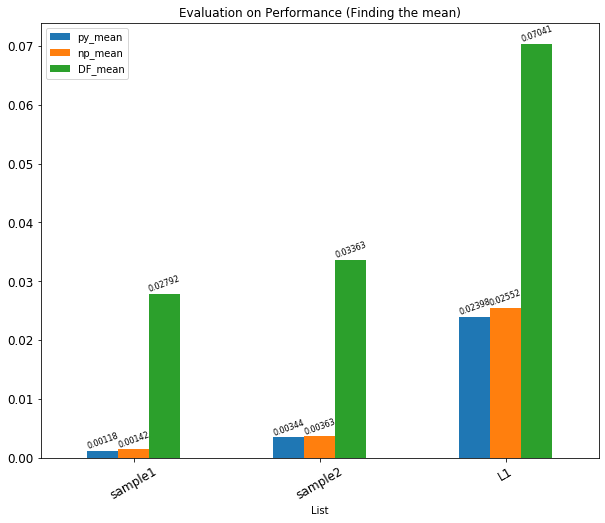

In [12]:
#plot the DataFrame
ax1 = DF1.plot.bar(x="List",y = names1,figsize=(10,8), legend=True, fontsize=12, title = "Evaluation on Performance (Finding the mean)")
ax1.tick_params(axis='x', rotation = 30)

#Annotates bars with values
for p in ax1.patches:
        ax1.annotate("%.5f" % p.get_height() ,(p.get_x() + p.get_width() / 2, p.get_height()),
             ha='center', va='center', rotation=20, xytext=(0, 10), textcoords='offset points',fontsize=8) 

In [13]:
#L1 - 10000 numbers
#calculate running time of np_mean is what percentage more than that of py_mean
print("%.2f%%" %((y1_1[1]-y1_1[0]) / y1_1[0] * 100))
#calculate running time of DF_mean is what percentage more than that of np_mean
print("%.2f%%" %((y1_1[2]-y1_1[1]) / y1_1[1] * 100))

6.41%
175.97%


In [14]:
#sample 1 - 100 numbers
print("%.2f%%" %((y1_2[1]-y1_2[0]) / y1_2[0] * 100))

print("%.2f%%" %((y1_2[2]-y1_2[1]) / y1_2[1] * 100))

20.15%
1866.07%


In [15]:
#sample 2 - 1000numbers
print("%.2f%%" %((y1_3[1]-y1_3[0]) / y1_3[0] * 100))

print("%.2f%%" %((y1_3[2]-y1_3[1]) / y1_3[1] * 100))

5.37%
827.52%


Evaluation 2

In [16]:
names2 = ["py_sort", "np_sort", "DF_sort"]
y2 = [y2_1, y2_2, y2_3]

import pandas as pd
DF2 = pd.DataFrame(y2, columns = names2)
DF2.insert(0, "List", lists, allow_duplicates=False)

DF2 = DF2.sort_values(by = ["py_sort"])
DF2

,List,py_sort,np_sort,DF_sort
1,sample1,0.000010,0.000012,0.000423
2,sample2,0.000061,0.000061,0.000524
0,L1,0.000639,0.000639,0.001417


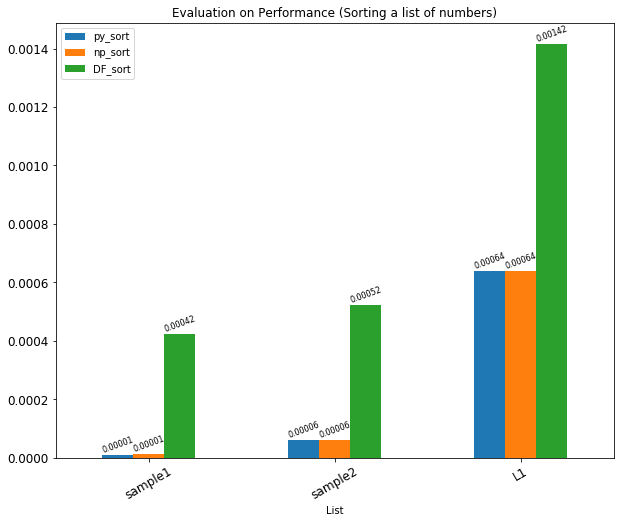

In [17]:
#plot the DataFrame
ax2 = DF2.plot.bar(x="List",y = names2,figsize=(10,8), legend=True, fontsize=12, title = "Evaluation on Performance (Sorting a list of numbers)")
ax2.tick_params(axis='x', rotation = 30)

#Annotates bars with values
for p in ax2.patches:
        ax2.annotate("%.5f" % p.get_height() ,(p.get_x() + p.get_width() / 2, p.get_height()),
             ha='center', va='center', rotation=20, xytext=(0, 10), textcoords='offset points',fontsize=8) 

In [18]:
#L1 - 10000 numbers
print("%.2f%%" %((y2_1[1]-y2_1[0]) / y2_1[0] * 100))

print("%.2f%%" %((y2_1[2]-y2_1[1]) / y2_1[1] * 100))

0.05%
121.82%


In [19]:
#sample 1 - 100 numbers
print("%.2f%%" %((y2_2[1]-y2_2[0]) / y2_2[0] * 100))

print("%.2f%%" %((y2_2[2]-y2_2[1]) / y2_2[1] * 100))

17.31%
3369.67%


In [20]:
#sample 2 - 1000numbers
print("%.2f%%" %((y2_3[1]-y2_3[0]) / y2_3[0] * 100))

print("%.2f%%" %((y2_3[2]-y2_2[1]) / y2_3[1] * 100))

0.65%
831.54%


Evaluation 3

In [21]:
names3 = ["np_median", "DF_median"]
y3 = [y3_1, y3_2, y3_3]

import pandas as pd
DF3 = pd.DataFrame(y3, columns = names3)
DF3.insert(0, "List", lists, allow_duplicates=False)

DF3 = DF3.sort_values(by = ["np_median"])
DF3

,List,np_median,DF_median
1,sample1,0.003422,0.023735
2,sample2,0.012389,0.036081
0,L1,0.127228,0.170335


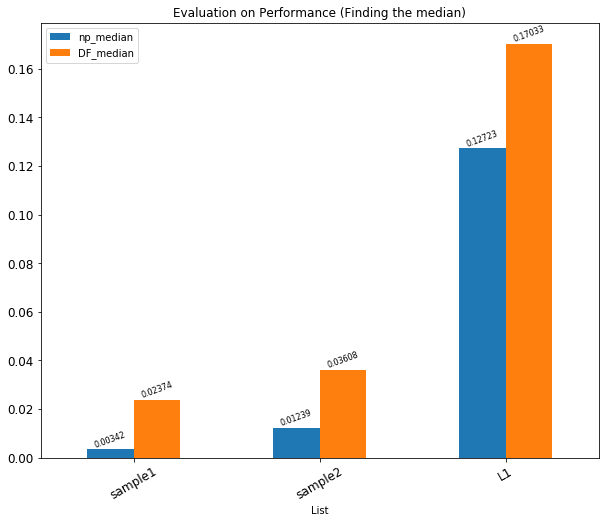

In [22]:
#plot the DataFrame
ax3 = DF3.plot.bar(x = "List",y = names3, figsize = (10,8), legend = True, fontsize = 12, title = "Evaluation on Performance (Finding the median)")
ax3.tick_params(axis = 'x', rotation = 30)

#Annotates bars with values
for p in ax3.patches:
        ax3.annotate("%.5f" % p.get_height() ,(p.get_x() + p.get_width() / 2, p.get_height()),
             ha='center', va='center', rotation=20, xytext=(0, 10), textcoords='offset points',fontsize=8) 

In [23]:
#L1 - 10000 numbers
#calculate running time of DF_median is what percentage more than that of np_median
print("%.2f%%" %((y3_1[1]-y3_1[0]) / y3_1[0] * 100))

33.88%


In [24]:
#sample 1 - 100 numbers
#calculate running time of DF_median is what percentage more than that of np_median
print("%.2f%%" %((y3_2[1]-y3_2[0]) / y3_2[0] * 100))

593.67%


In [25]:
#sample 2 - 1000numbers
#calculate running time of DF_median is what percentage more than that of np_median
print("%.2f%%" %((y3_3[1]-y3_3[0]) / y3_3[0] * 100))

191.23%


# Doctest

In [26]:
#Calculate the mean in a tranditional way. Prepare the value of the mean for the doctests.
import random
random.seed(42)
L = [random.random() for i in range(10000)] 
import numpy as np
L1 = np.array(L)
mean = round(sum(L1) / len(L1),5)

#Calculate the median in a tranditional way. Prepare the value of the median for the doctests.
L2 = sorted(L1)
if (len(L2) % 2) == 0:
    median = round((L2[(len(L2)//2)-1]+L2[len(L2)//2])/2,5)
else:
    median = round(L2[int(len(L2)//2)],5)
    
print(mean,median)

0.50025 0.50064


In [27]:
def py_meantest(List):
    """
    This function is finding the mean of a list of numbers
    >>> py_meantest(L1)
    0.50025
    """
    
    import numpy as np
    Array = np.array(List)
    mean1 = round(Array.mean(),5)
    return mean1


In [28]:
def np_meantest(List):
    """
    This function is finding the mean of a list of numbers
    >>> np_meantest(L1)
    0.50025
    """
    
    import numpy as np
    mean2 = round(np.mean(List),5)
    return mean2

In [29]:
def DF_meantest(List):
    """
    This function is finding the mean of a list of numbers
    >>> DF_meantest(L1)
    0.50025
    """
        
    import pandas as pd
    Ldf = pd.DataFrame(data = List, columns=["number"])
    mean3 = list(round(pd.DataFrame.mean(Ldf),5))[0]
    return mean3

In [30]:
def np_mediantest(List):
    """
    This function is finding the median of a list of numbers
    >>> np_mediantest(L1)
    0.50064
    """
    SortedList = sorted(List)
    import numpy as np
    median1 = round(np.median(SortedList),5)
    return median1

In [31]:
def DF_mediantest(List):
    """
    This function is finding the median of a list of numbers
    >>> DF_mediantest(L1)
    0.50064
    """
    SortedList = sorted(List)
    import pandas as pd
    Ldf = pd.DataFrame(data = SortedList, columns=["number"])
    median2 = list(round((pd.DataFrame.median(Ldf)),5))[0]
    return median2

In [32]:
py_meantest(L1)
np_meantest(L1)
DF_meantest(L1)

0.50025

In [33]:
np_mediantest(L1)
DF_mediantest(L1)

0.50064

In [34]:
if __name__ == "__main__":
    import doctest
    doctest.testmod(verbose=True)

Trying:
    DF_meantest(L1)
Expecting:
    0.50025
ok
Trying:
    DF_mediantest(L1)
Expecting:
    0.50064
ok
Trying:
    np_meantest(L1)
Expecting:
    0.50025
ok
Trying:
    np_mediantest(L1)
Expecting:
    0.50064
ok
Trying:
    py_meantest(L1)
Expecting:
    0.50025
ok
4 items had no tests:
    __main__
    __main__.timing1
    __main__.timing2
    __main__.timing3
5 items passed all tests:
   1 tests in __main__.DF_meantest
   1 tests in __main__.DF_mediantest
   1 tests in __main__.np_meantest
   1 tests in __main__.np_mediantest
   1 tests in __main__.py_meantest
5 tests in 9 items.
5 passed and 0 failed.
Test passed.
